# Set Working Directory and List

In [87]:
# Set working directory
import os
#os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/Applied_Data_Science/Gruppe')
os.chdir('C:/Users/manue/OneDrive - ZHAW/MSc Wirtschaftsinformatik/2. Semester/Applied Data Science/ADS Projekt')
# Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [88]:
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

In [89]:
# List with URLS for Webscraping part 1
url_1_raw = "URL_1.txt"
url_1 = [line.rstrip('\n') for line in open(url_1_raw)]
url_1[:5]

['https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=20735&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=193736&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=324977&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=1555183&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=3193857&dateStart=01.05.']

In [90]:
# List with URLS for Webscraping part 2
url_2_raw = "URL_2.txt"
url_2 = [line.rstrip('\n') for line in open(url_2_raw)]
url_2[:5]

['&interval=Y5&assetName=DAX&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=EURO STOXX 50&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=Dow Jones&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=SMI&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=MSCI WORLD &exchange=auÃŸerbÃ¶rslich']

## Get Data with automated Scraping (Onvista)

In [ ]:
from selenium import webdriver
#from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
import random

opts = Options()
opts.add_argument("--headless")
#opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
#driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)
driver = webdriver.Chrome(executable_path='geckodriver.exe', options=opts)

#Websites to Scrape
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]

#IndexListe= ["DAX"]

# Daten in csv Datei schreiben
import pandas as pd
import csv



#Scraping Loop
x=0
while x < len(url_1):
    Text=""
    Jahr=2002
    while Jahr <=2017:
        URL = str(url_1[x])+str(Jahr)+str(url_2[x])
        driver.get(URL)
        text1 = driver.find_element_by_css_selector('body > div.INHALT.WEBSEITE > article > table > tbody').text
        Text= Text + '\n' + text1
        templist = []
        Table_dict={ 'Gescrapte Finanzdaten': Text}
        templist.append(Table_dict)
        df = pd.DataFrame(templist)
        df.to_csv(IndexListe[x]+".csv")
        Jahr+=5
    x+=1
    
    



# Examples using tag name
#text = driver.find_element_by_xpath('/html/body/div[1]/article').text

# Further examples (find out by yourself)
# text = driver.find_element_by_name('').text
# text = driver.find_element_by_tag_name('').text
# text = driver.find_element_by_id('').text

## Data Cleansing and Preparation onvista

In [94]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
SchlussIndexListe= ["Schluss DAX", "Schluss EURO STOXX 50", "Schlusss Dow Jones",  "Schluss SMI", "Schluss MSCI World", "Schluss FTSE", "Schluss ATX", "Schluss SDAX", "Schluss Tec DAX", "Schluss NASDAQ 100", "Schluss Nikkei", "Schluss Hang Seng", "Schluss SHANGHAI STOCK EXCHANGE B SHARES", "Schluss Emerging Markets", "Schluss Bovespa"]
Indexdf= ["dfDAX", "dfEURO STOXX 50", "dfDow Jones",  "dfSMI", "dfMSCI World", "dfFTSE", "dfATX", "dfSDAX", "dfTec DAX", "dfNASDAQ 100", "dfNikkei", "dfHang Song", "dfSHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
x=0
j=0
while x < len(IndexListe):
    Indexdf[x]= pd.read_csv(IndexListe[x]+".csv", delimiter=' ', header=None, skiprows=2, names=['Datum','Eröffnung','Hoch','Tief',SchlussIndexListe[x],'Volumen'], index_col=False)
    Indexdf[x]=pd.DataFrame(Indexdf[x])
    Indexdf[x].drop(columns=['Eröffnung','Hoch','Tief','Volumen'], inplace=True)
    x+=1

x=1
result=Indexdf[0]
while x < len(IndexListe):
    result=pd.merge(result, Indexdf[x], how="inner", on="Datum")
    x+=1
    
x=0
while x < len(IndexListe):
    for i in range (len(result)):
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace('.','')
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace(',','.')
        i+=1
    x+=1

#df
#result=pd.concat([Indexdf[0], Indexdf[1]], axis=1)
#result=Indexdf[0].append([Indexdf[1], Indexdf[2], Indexdf[3], Indexdf[4], Indexdf[5], Indexdf[6], Indexdf[7], Indexdf[8], Indexdf[9], Indexdf[10], Indexdf[11], Indexdf[12]])

#result = result.dropna()
# Show the content of the dataframe:



In [95]:
result.shape

(3773, 16)

In [96]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 3772
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Datum                                     3773 non-null   object
 1   Schluss DAX                               3773 non-null   object
 2   Schluss EURO STOXX 50                     3773 non-null   object
 3   Schlusss Dow Jones                        3773 non-null   object
 4   Schluss SMI                               3773 non-null   object
 5   Schluss MSCI World                        3773 non-null   object
 6   Schluss FTSE                              3773 non-null   object
 7   Schluss ATX                               3773 non-null   object
 8   Schluss SDAX                              3773 non-null   object
 9   Schluss Tec DAX                           3773 non-null   object
 10  Schluss NASDAQ 100                        3773 n

In [97]:
result[SchlussIndexListe] = result[SchlussIndexListe].astype(float, errors = 'raise')
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 3772
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datum                                     3773 non-null   object 
 1   Schluss DAX                               3773 non-null   float64
 2   Schluss EURO STOXX 50                     3773 non-null   float64
 3   Schlusss Dow Jones                        3773 non-null   float64
 4   Schluss SMI                               3773 non-null   float64
 5   Schluss MSCI World                        3773 non-null   float64
 6   Schluss FTSE                              3773 non-null   float64
 7   Schluss ATX                               3773 non-null   float64
 8   Schluss SDAX                              3773 non-null   float64
 9   Schluss Tec DAX                           3773 non-null   float64
 10  Schluss NASDAQ 100                  

In [98]:
result = result.dropna()
result.isna().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schlusss Dow Jones                          0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [99]:
result.isnull().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schlusss Dow Jones                          0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [100]:
result.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3768    False
3769    False
3770    False
3771    False
3772    False
Length: 3773, dtype: bool

In [101]:
result.duplicated().sum()

0

In [102]:
result.describe()

,Schluss DAX,Schluss EURO STOXX 50,Schlusss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.00000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000
mean,8550.419011,3191.705274,16771.938249,7911.460668,1613.512999,6061.554718,2779.153994,7190.412945,1451.34216,4359.411967,15887.306422,21506.246886,235.365964,921.801718,60636.199134
std,3444.438166,564.651373,7428.616086,1853.527860,553.007224,1000.611558,799.192931,3892.874125,986.41658,3720.321670,5791.196812,5165.454161,90.697177,243.351618,26808.515976
min,2423.870000,1817.240000,6594.440000,4085.600000,688.638000,3512.090000,1159.880000,1694.580000,329.52000,1018.660000,7054.980000,8409.000000,51.340000,272.267000,11206.000000
25%,5802.260000,2774.200000,10858.140000,6319.180000,1193.880000,5395.700000,2228.520000,4166.520000,707.19000,1734.680000,10646.950000,18892.790000,177.790000,807.454000,45120.360000
50%,7741.700000,3161.600000,13551.780000,8037.940000,1515.992000,6140.390000,2605.400000,5903.660000,920.13000,2718.720000,15391.480000,22300.230000,249.375000,977.612000,57068.180000
75%,11585.100000,3567.020000,21173.690000,9039.610000,1892.967000,6826.050000,3280.440000,10083.340000,2246.84000,5727.066000,20037.470000,24882.000000,294.035000,1071.060000,70499.160000
max,16271.750000,4556.970000,36799.650000,12926.560000,3248.118000,7788.440000,4971.370000,17412.570000,3986.96000,16573.343000,30670.100000,33111.950000,536.093000,1430.026000,130776.270000


In [103]:
result.to_csv("Indizes.csv")    
result

,Datum,Schluss DAX,Schluss EURO STOXX 50,Schlusss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
0,25.03.2003,2636.10,2184.98,8280.20,4263.60,771.798,3762.00,1159.88,1712.51,344.77,1066.570,8238.76,9062.15,119.090,277.982,11248.00
1,26.03.2003,2579.33,2172.64,8229.80,4247.10,770.102,3793.10,1171.04,1717.30,346.33,1066.300,8351.92,9047.09,118.060,278.743,11206.00
2,27.03.2003,2584.05,2132.51,8201.40,4194.50,766.602,3729.10,1166.62,1703.45,340.55,1061.930,8368.67,8872.32,122.610,277.431,11233.00
3,28.03.2003,2520.84,2132.11,8145.70,4207.60,762.954,3708.50,1162.82,1697.90,338.76,1046.720,8280.16,8848.26,121.650,277.317,11396.00
4,31.03.2003,2423.87,2036.86,7992.10,4085.60,748.628,3613.30,1163.11,1694.58,329.52,1018.660,7972.71,8634.45,122.460,272.267,11273.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,22.04.2022,14142.09,3840.01,33811.40,12258.33,2882.453,7521.68,3295.16,14225.23,3172.62,13356.869,27105.26,20616.81,288.973,1075.598,111077.51
3769,25.04.2022,13924.17,3757.59,34049.46,12084.98,2877.705,7380.54,3227.02,13882.57,3146.53,13533.224,26590.78,19876.88,278.236,1046.043,110684.95
3770,26.04.2022,13756.40,3721.36,33240.18,11933.28,2810.996,7386.19,3194.05,13706.51,3079.53,13009.712,26700.11,19898.74,275.658,1049.394,108212.86
3771,27.04.2022,13793.94,3734.64,33301.93,12051.48,2807.510,7425.61,3232.27,13684.57,3091.05,13003.356,26386.63,19972.84,283.198,1043.744,109349.37


In [104]:
print("Anzahl Zeilen im Datensatz: {}".format(result.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(result.shape[1]))

Anzahl Zeilen im Datensatz: 3773
Anzahl Spalten im Datensatz: 16


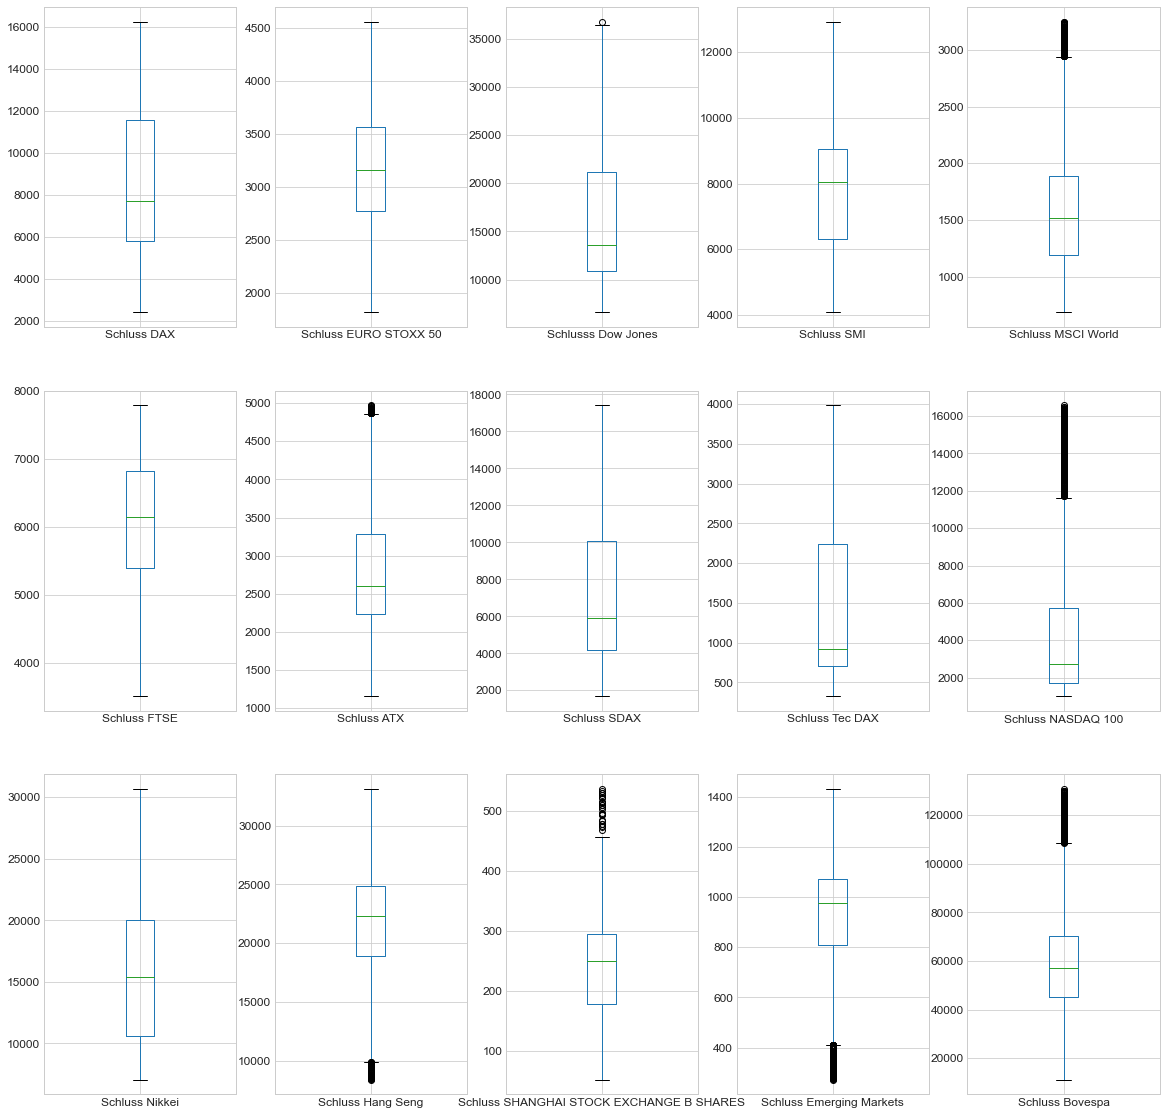

In [105]:
result.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Get Data with API (Yahoo-Finance)

In [236]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance
#!pip install requests
#!pip install cryptowatch
#!pip install cryptowatch-sdk

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2002-1-1')['Adj Close']

#CL=F: Öl
#PL=F: Platinum
#SI=F: Silver
#ZW=F: Weizen

data

#data.to_csv("Rohstoffe.csv") 

[*********************100%***********************]  5 of 5 completed


,CL=F,GC=F,PL=F,SI=F,ZW=F
Date,,,,,
2001-12-31,19.840000,278.700012,493.000000,4.579000,291.00
2002-01-02,21.010000,278.899994,483.500000,4.526000,292.00
2002-01-03,20.370001,278.200012,485.500000,4.599000,292.25
2002-01-04,21.620001,278.899994,478.200012,4.642000,301.00
2002-01-07,21.480000,278.600006,476.299988,4.660000,308.00
...,...,...,...,...,...
2022-06-01,115.260002,1843.300049,997.200012,21.884001,1041.25
2022-06-02,116.870003,1866.500000,1029.199951,22.254000,1058.25
2022-06-03,118.870003,1845.400024,1017.200012,21.889999,1040.00


## Data Cleansing and Preparation Yahoo-Finance

In [9]:
data.shape

(5147, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5147 entries, 2001-12-31 to 2022-06-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    5136 non-null   float64
 1   GC=F    5132 non-null   float64
 2   PL=F    4434 non-null   float64
 3   SI=F    5132 non-null   float64
 4   ZW=F    5120 non-null   float64
dtypes: float64(5)
memory usage: 241.3 KB


In [11]:

data.isna().sum()

CL=F     11
GC=F     15
PL=F    713
SI=F     15
ZW=F     27
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isna().sum()

CL=F    0
GC=F    0
PL=F    0
SI=F    0
ZW=F    0
dtype: int64

In [15]:
data.duplicated()

Date
2001-12-31    False
2002-01-02    False
2002-01-03    False
2002-01-04    False
2002-01-07    False
              ...  
2022-06-01    False
2022-06-02    False
2022-06-03    False
2022-06-06    False
2022-06-07    False
Length: 4421, dtype: bool

In [16]:
data.duplicated().sum()

0

In [18]:
data.describe()

,CL=F,GC=F,PL=F,SI=F,ZW=F
count,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000
mean,65.199923,1166.229201,1128.668310,17.701926,544.660880
std,24.578850,478.573224,350.319971,8.360062,176.529042
min,-37.630001,278.100006,465.200012,4.243000,256.000000
25%,46.599998,838.900024,874.900024,13.327000,421.000000
50%,61.700001,1254.400024,1007.599976,17.014999,513.750000
75%,86.129997,1506.199951,1429.900024,22.475000,653.250000
max,145.289993,2051.500000,2251.100098,48.584000,1425.250000


In [20]:
print("Anzahl Zeilen im Datensatz: {}".format(data.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(data.shape[1]))

Anzahl Zeilen im Datensatz: 4421
Anzahl Spalten im Datensatz: 5


In [21]:
data.to_csv("Rohstoffe.csv")    
data

,CL=F,GC=F,PL=F,SI=F,ZW=F
Date,,,,,
2001-12-31,19.840000,278.700012,493.000000,4.579000,291.00
2002-01-02,21.010000,278.899994,483.500000,4.526000,292.00
2002-01-03,20.370001,278.200012,485.500000,4.599000,292.25
2002-01-04,21.620001,278.899994,478.200012,4.642000,301.00
2002-01-07,21.480000,278.600006,476.299988,4.660000,308.00
...,...,...,...,...,...
2022-06-01,115.260002,1843.300049,997.200012,21.884001,1041.25
2022-06-02,116.870003,1866.500000,1029.199951,22.254000,1058.25
2022-06-03,118.870003,1845.400024,1017.200012,21.889999,1040.00


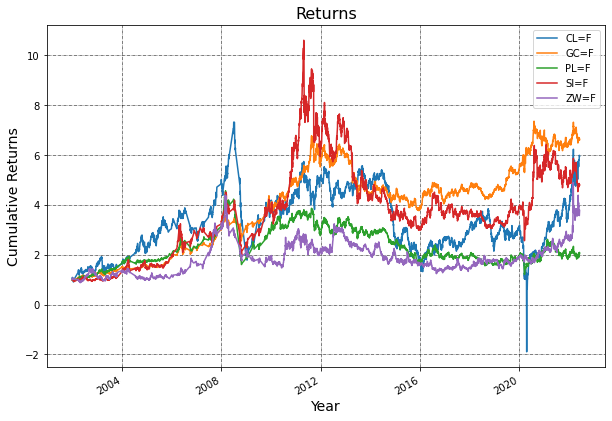

In [22]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

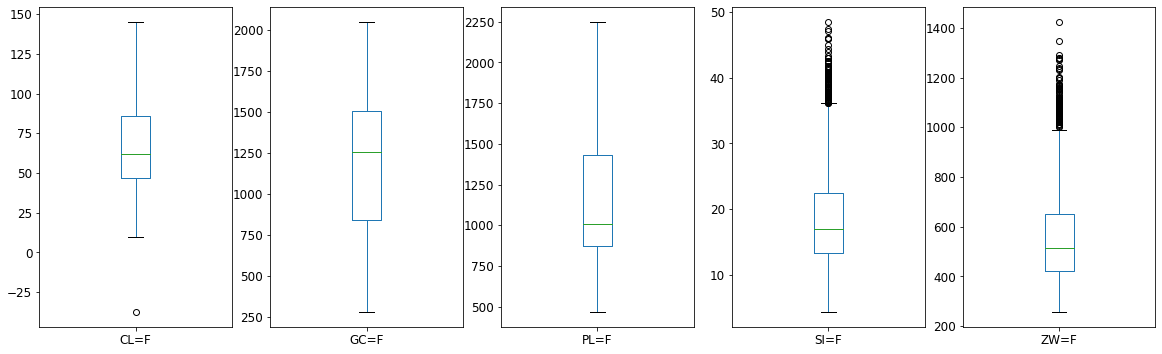

In [24]:
data.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Get Data with API (Cryptowatch)

In [ ]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotheksimport zur Warnungssteuerung
import warnings
warnings.filterwarnings("ignore")
#Instalacion e importacion de libreria de Cryptowatch
import logging
import cryptowatch as cw
#API-SCHLÜSSEL erforderlich, um die Cryptowatch-Bibliothek zu verwenden
cw.api_key = "BM0DRS9QDJ4W7JCL76PD"

logging.basicConfig()
logging.getLogger("cryptowatch").setLevel(logging.WARNING)

cw.exchanges.list()

#Wählen Sie Exchange und CryptoActive zur Analyse aus


##Sehen Sie sich die verschiedenen Cryptoactives an, die in der ausgewählten Börse verfügbar sind
#list = []
#selected = cw.markets.list(MARKET)
#for market in selected.markets:
#    list.append(market.pair)
#df_list = pd.DataFrame (list, columns = ['Währung'])
#print(df_list)

#Wir wählen das Ticket (Paar der ausgewählten Kryptoaktiven) aus, von dem wir alle seine Daten erhalten möchten
#candles = cw.markets.get(MARKET+":"+TICKET, ohlc=True, periods=["1m","15m","4h", "1h", "1d", "1w"])
MARKET ="BINANCE"
IndexTICKET=["etheur", "btceur", "xrpeur", "adaeur", "dogeeur", "neareur", "soleur"]
Indexdf=["dfetheur", "dfbtceur", "dfxrpeur", "dfadaeur", "dfdogeeur", "dfneareur", "dfsoleur"]

y=0
#while y < len(IndexTICKET):
candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )

Indexdf

[               close_ts  etheur close_value
 0   2020-01-04 01:00:00              113.80
 1   2020-01-05 01:00:00              120.00
 2   2020-01-06 01:00:00              120.39
 3   2020-01-07 01:00:00              121.20
 4   2020-01-08 01:00:00              128.86
 ..                  ...                 ...
 882 2022-06-04 02:00:00             1706.13
 883 2022-06-05 02:00:00             1656.46
 884 2022-06-06 02:00:00             1685.30
 885 2022-06-07 02:00:00             1684.62
 886 2022-06-08 02:00:00             1740.17
 
 [887 rows x 2 columns],
                close_ts  btceur close_value
 0   2020-01-04 01:00:00             6244.33
 1   2020-01-05 01:00:00             6558.96
 2   2020-01-06 01:00:00             6590.90
 3   2020-01-07 01:00:00             6568.18
 4   2020-01-08 01:00:00             6942.65
 ..                  ...                 ...
 882 2022-06-04 02:00:00            28331.83
 883 2022-06-05 02:00:00            27716.41
 884 2022-06-06 02:00:00    

In [37]:
x=1
result=Indexdf[0]
while x < len(IndexTICKET):
    result=pd.merge(result, Indexdf[x], how="inner", on="close_ts")
    x+=1
    
result.to_csv("Krypto.csv")    
result

,close_ts,etheur close_value,btceur close_value,xrpeur close_value,adaeur close_value,dogeeur close_value,neareur close_value,soleur close_value
0,2022-03-19 01:00:00,2537.61,36924.14,0.7163,0.7540,0.10510,9.510,79.21
1,2022-03-20 01:00:00,2664.79,37859.61,0.7222,0.7720,0.10790,10.277,81.49
2,2022-03-21 01:00:00,2672.06,38233.04,0.7419,0.8170,0.11190,10.236,83.60
3,2022-03-22 01:00:00,2595.57,37427.62,0.7311,0.7970,0.10800,9.639,80.39
4,2022-03-23 01:00:00,2624.68,37245.31,0.7603,0.8330,0.10830,9.955,80.46
...,...,...,...,...,...,...,...,...
77,2022-06-04 02:00:00,1706.13,28331.83,0.3769,0.5465,0.07700,5.206,38.08
78,2022-06-05 02:00:00,1656.46,27716.41,0.3644,0.5230,0.07500,4.908,35.75
79,2022-06-06 02:00:00,1685.30,27890.00,0.3670,0.5299,0.07643,4.976,36.45
80,2022-06-07 02:00:00,1684.62,27906.45,0.3687,0.5293,0.07561,5.122,35.92


## Data Cleansing and Preparation Yahoo-Finance

In [45]:
result.shape

(82, 8)

In [46]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   close_ts             82 non-null     datetime64[ns]
 1   etheur close_value   82 non-null     float64       
 2   btceur close_value   82 non-null     float64       
 3   xrpeur close_value   82 non-null     float64       
 4   adaeur close_value   82 non-null     float64       
 5   dogeeur close_value  82 non-null     float64       
 6   neareur close_value  82 non-null     float64       
 7   soleur close_value   82 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 5.8 KB


In [47]:
result.isna().sum()

close_ts               0
etheur close_value     0
btceur close_value     0
xrpeur close_value     0
adaeur close_value     0
dogeeur close_value    0
neareur close_value    0
soleur close_value     0
dtype: int64

In [48]:
result.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
81    False
Length: 82, dtype: bool

In [49]:
result.duplicated().sum()

0

In [51]:
result.describe()

,etheur close_value,btceur close_value,xrpeur close_value,adaeur close_value,dogeeur close_value,neareur close_value,soleur close_value
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2469.064878,34711.886341,0.581567,0.755993,0.110386,10.359878,77.033780
std,495.495801,5257.706925,0.153988,0.207587,0.023467,3.857280,25.663566
min,1608.710000,26664.450000,0.356000,0.425300,0.072800,4.504000,35.750000
25%,1931.247500,28645.970000,0.397050,0.530850,0.081795,6.144750,48.452500
50%,2673.055000,36648.525000,0.614900,0.786050,0.121600,10.978500,83.455000
75%,2834.427500,38395.392500,0.723475,0.886250,0.129475,13.978750,94.547500
max,3209.330000,42897.360000,0.786300,1.105000,0.158600,16.216000,124.130000


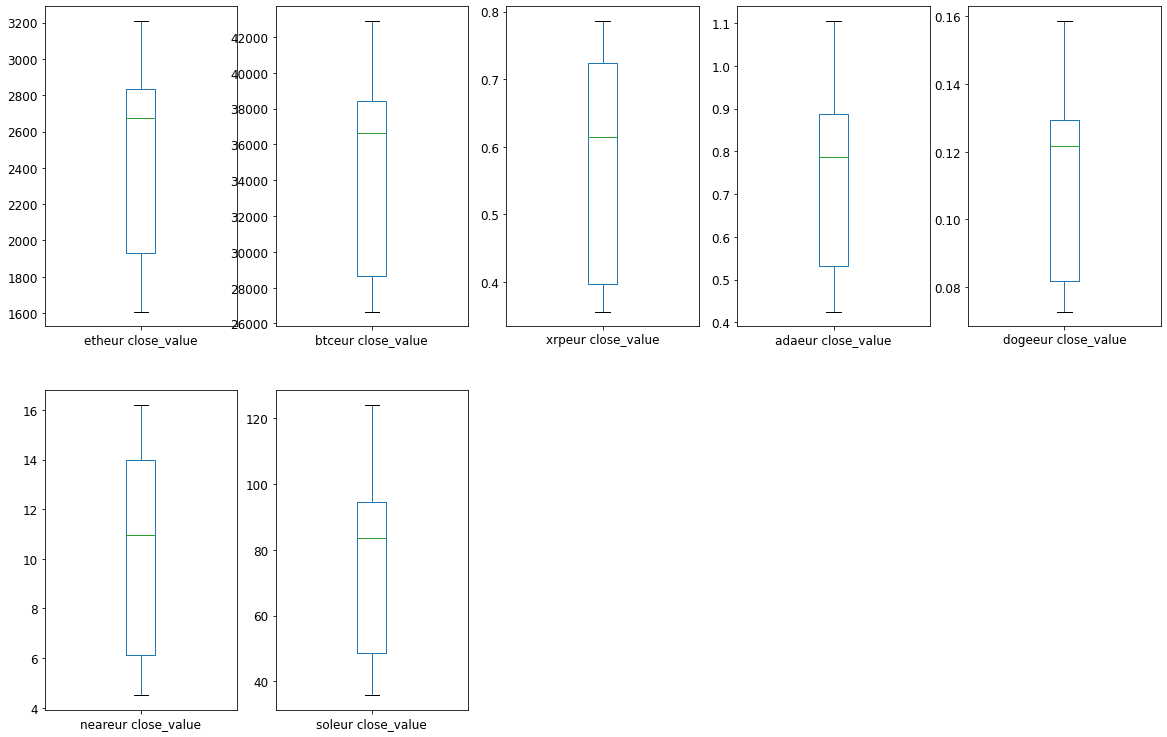

In [53]:
result.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Vorhersage eines Index anhand von weiteren Indizes mittels linearer Regression

## Machine Learning Pipeline: Wrapping up for Deployment


In the previous notebooks, we worked through the typical Machine Learning pipeline steps to build a regression model that allows us to predict house prices. Briefly, we transformed variables in the dataset to make them suitable for use in a Regression model, then we selected the most predictive variables and finally we trained our model.

Now, we want to deploy our model. We want to create an API, which we can call with new data, with new characteristics about houses, to get an estimate of the SalePrice. In order to do so, we need to write code in a very specific way. We will show you how to write production code in the next sections.

Here, we will summarise the key pieces of code, that we need to take forward for this particular project, to put our model in production.

Let's go ahead and get started.

### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [12]:
# to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to build the models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')


## Load data

We need the training data to train our model in the production environment. 

In [13]:
# load dataset
data = pd.read_csv('Indizes.csv')
data = data.drop(data.columns[0],axis=1)
data = data.drop(data.columns[0],axis=1)
#data = data['Eröffnung_x'.replace('.','')



#data['Eröffnung_x'] = data['Eröffnung_x'].astype("float64")
#data['Eröffnung_y'] = data['Eröffnung_y'].astype("float64")
#data = data.drop(data.columns[0],axis=1)
print(data)
#data.head()
data.info()

#data = data['Eröffnung_x'.replace('.','')



#data['Eröffnung_x'] = data['Eröffnung_x'].astype("float64")
#data['Eröffnung_y'] = data['Eröffnung_y'].astype("float64")
#data = data.drop(data.columns[0],axis=1)
print(data)
#data.head()
data.info()


      Schluss DAX  Schluss EURO STOXX 50  Schluss Dow Jones  Schluss SMI  \
0         2548.37                2124.78            8214.60      4230.70   
1         2636.10                2184.98            8280.20      4263.60   
2         2579.33                2172.64            8229.80      4247.10   
3         2584.05                2132.51            8201.40      4194.50   
4         2520.84                2132.11            8145.70      4207.60   
...           ...                    ...                ...          ...   
3772     14142.09                3840.01           33811.40     12258.33   
3773     13924.17                3757.59           34049.46     12084.98   
3774     13756.40                3721.36           33240.18     11933.28   
3775     13793.94                3734.64           33301.93     12051.48   
3776     13979.84                3777.02           33916.39     12068.41   

      Schluss MSCI World  Schluss FTSE  Schluss ATX  Schluss SDAX  \
0                7

<AxesSubplot:>

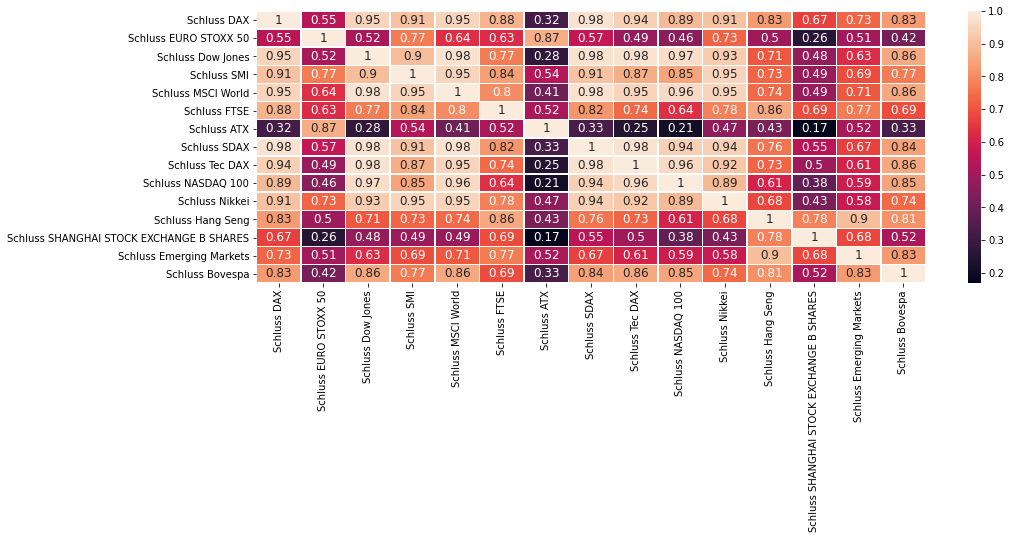

In [14]:
import seaborn as sns
df_heatmap = data.corr().round(2)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 12}, linewidths=.5)

## Separate dataset into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['Schluss DAX'],
    test_size=0.1,
    # we are setting the seed here
    random_state=0)

X_train.shape, X_test.shape


((3399, 15), (378, 15))

In [16]:
X_train.head()


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
1710,6346.19,2462.36,12231.11,5852.66,1254.203,5702.24,2065.30,4661.45,716.82,2401.290,9050.47,20019.24,253.584,1010.119,59333.53
326,3854.41,2734.37,9749.99,5309.70,1047.084,4564.50,2082.97,2874.10,491.41,1432.570,10659.15,12818.10,86.240,464.380,22602.60
3221,12490.74,3532.87,27349.19,9965.15,2209.587,7556.86,3017.63,11075.25,2912.46,7954.564,21620.88,28465.65,287.382,1055.486,103704.28
1364,5654.48,2793.29,10185.53,6496.33,1129.287,5247.41,2541.25,3668.68,812.90,1760.720,10205.02,20243.75,237.617,934.223,66664.96
3696,15380.79,4137.11,35227.03,12375.35,3117.306,7232.28,3745.00,16113.44,3752.95,15846.158,27927.37,23348.23,281.885,1213.958,107038.91


### Feature Scaling

For use in linear models, features need to be either scaled or normalised. In the next section, I will scale features between the min and max values:

In [36]:
# capture the target
#y_train = X_train['Eröffnung_y']
#y_test = X_test['Eröffnung_y']


In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train)
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
scaled = scaler.transform(X_train)
for i, col in enumerate(IndexListe):
    X_train[col] = scaled[:,i]

scaled_test = scaler.transform(X_test)

print('Vor dem Scaling:')
display(X_test.head())

for i, col in enumerate(IndexListe):
    X_test[col] = scaled_test[:,i]

print('\nNach dem Scaling:')
display(X_test.head())




Vor dem Scaling:


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
501,4911.17,3338.99,10544.90,6731.58,1215.582,5347.40,3405.57,4194.61,599.10,1589.630,12834.25,15086.62,68.940,635.550,29049.990
3745,12831.51,3505.29,32632.64,11057.06,2797.696,6964.11,2972.99,13084.80,2920.93,13267.604,24790.95,20741.04,273.716,1096.047,111239.360
2486,10210.44,3221.14,16330.40,8778.76,1625.403,6155.81,2281.31,8711.25,1729.78,4296.299,18299.62,21562.50,303.544,804.157,46503.994
1976,8058.37,2744.70,14539.14,7842.85,1440.207,6529.41,2512.70,6031.49,927.39,2807.300,12381.19,22619.18,262.874,1047.698,57281.020
989,6393.39,3558.66,12392.66,7013.87,1400.352,5605.80,3600.40,4310.88,716.22,1761.050,11964.16,21384.61,245.681,1065.940,61932.700



Nach dem Scaling:


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa,DAX,EURO STOXX 50,Dow Jones,SMI,MSCI World,FTSE,ATX,SDAX,Tec DAX,NASDAQ 100,Nikkei,Hang Seng,SHANGHAI STOCK EXCHANGE B SHARES,Emerging Markets,Bovespa
501,4911.17,3338.99,10544.90,6731.58,1215.582,5347.40,3405.57,4194.61,599.10,1589.630,12834.25,15086.62,68.940,635.550,29049.990,0.179616,0.555438,0.130787,0.299287,0.205879,0.430147,0.589480,0.159055,0.074117,0.036903,0.244728,0.269548,0.036307,0.313781,0.150329
3745,12831.51,3505.29,32632.64,11057.06,2797.696,6964.11,2972.99,13084.80,2920.93,13267.604,24790.95,20741.04,273.716,1096.047,111239.360,0.751569,0.616137,0.862043,0.788541,0.824018,0.809061,0.476067,0.724661,0.712468,0.791667,0.751043,0.498686,0.458741,0.711530,0.836817
2486,10210.44,3221.14,16330.40,8778.76,1625.403,6155.81,2281.31,8711.25,1729.78,4296.299,18299.62,21562.50,303.544,804.157,46503.994,0.562293,0.512423,0.322327,0.530843,0.365998,0.619617,0.294723,0.446410,0.384980,0.211838,0.476163,0.531974,0.520273,0.459413,0.296114
1976,8058.37,2744.70,14539.14,7842.85,1440.207,6529.41,2512.70,6031.49,927.39,2807.300,12381.19,22619.18,262.874,1047.698,57281.020,0.406885,0.338522,0.263024,0.424982,0.293641,0.707179,0.355389,0.275920,0.164375,0.115602,0.225542,0.574795,0.436375,0.669769,0.386129
989,6393.39,3558.66,12392.66,7013.87,1400.352,5605.80,3600.40,4310.88,716.22,1761.050,11964.16,21384.61,245.681,1065.940,61932.700,0.286652,0.635617,0.191961,0.331216,0.278070,0.490709,0.640561,0.166453,0.106317,0.047982,0.207883,0.524765,0.400907,0.685525,0.424982


In [38]:
# explore maximum values of variables
scaler.data_max_


array([ 16271.75 ,   4556.97 ,  36799.65 ,  12926.56 ,   3248.118,
         7778.79 ,   4971.37 ,  17412.57 ,   3966.75 ,  16491.009,
        30670.1  ,  33111.95 ,    536.093,   1430.026, 130776.27 ])

In [39]:
# explore minimum values of variables
scaler.data_min_


array([ 2423.87 ,  1817.24 ,  6594.44 ,  4085.6  ,   688.638,  3512.09 ,
        1157.18 ,  1694.58 ,   329.52 ,  1018.66 ,  7054.98 ,  8435.   ,
          51.34 ,   272.267, 11052.   ])

In [ ]:
IndizesName = input("Please enter the name of the Index you want to predict: ")
print(IndizesName)